![Diabetes](https://www.diabetes.co.uk/wp-content/uploads/2019/01/How-to-Bring-Down-High-Blood-Sugar-Levels-1.png)

Hello Kagglers, <br>
    In this notebook I tried to create an optimal model for Diabetes Prediction from given .csv data.<br>
    Points covered are:<br>
     0] Exploratory Data Analysis and Visualization<br>
     1] Data Normalized Distribution<br>
     2] Data Up-Sampling  for Imbalance data<br>
     3] Feature Engineering and Selection<br>
     4] Fine tuning of Models.<br>
 <br>
 If you found this notebook helpful, your *Upvote Will Encourage Me* !!! 😀😇😊
 
 ## Problem Statement : Diabetes Prediction
 

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,plot_confusion_matrix

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("Heart Disease Prediction.csv")
data.head(10)

Age  Sex  Cpericarditis  RestingBP  Cholestrol  FastingBP  RestingECG  \
0   52    1              0        125         212          0           1   
1   53    1              0        140         203          1           0   
2   70    1              0        145         174          0           1   
3   61    1              0        148         203          0           1   
4   62    0              0        138         294          1           1   
5   58    0              0        100         248          0           0   
6   58    1              0        114         318          0           2   
7   55    1              0        160         289          0           0   
8   46    1              0        120         249          0           0   
9   54    1              0        122         286          0           0   

   MaximumHR  ExerciseIA  Oldpeak  slope  Ca  Thal  Outcome  
0        168           0      1.0      2   2     3        0  
1        155           1      3.1      0   0     3        0  
2        125           1      2.6      0   0     3        0  
3        161           0      0.0      2   1     3        0  
4        106           0      1.9      1   3     2        0  
5        122           0      1.0      1   0     2        1  
6        140           0      4.4      0   3     1        0  
7        145           1      0.8      1   1     3        0  
8        144           0      0.8      2   0     3        0  
9        116           1      3.2      1   2     2        0

In [4]:
data.tail(10)

Age  Sex  Cpericarditis  RestingBP  Cholestrol  FastingBP  RestingECG  \
1318   67    1              2        152         212          0           0   
1319   44    1              0        120         169          0           1   
1320   63    1              0        140         187          0           0   
1321   63    0              0        124         197          0           1   
1322   59    1              0        164         176          1           0   
1323   57    0              0        140         241          0           1   
1324   45    1              3        110         264          0           1   
1325   68    1              0        144         193          1           1   
1326   57    1              0        130         131          0           1   
1327   57    0              1        130         236          0           0   

      MaximumHR  ExerciseIA  Oldpeak  slope  Ca  Thal  Outcome  
1318        150           0      0.8      1   0     3        0  
1319        144           1      2.8      0   0     1        0  
1320        144           1      4.0      2   2     3        0  
1321        136           1      0.0      1   0     2        0  
1322         90           0      1.0      1   2     1        0  
1323        123           1      0.2      1   0     3        0  
1324        132           0      1.2      1   0     3        0  
1325        141           0      3.4      1   2     3        0  
1326        115           1      1.2      1   1     3        0  
1327        174           0      0.0      1   1     2        0

In [5]:
#Shape of Data
data.shape

(1328, 14)

# Exploratory Data Analysis.

In [6]:
#infromation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1328 non-null   int64  
 1   Sex            1328 non-null   int64  
 2   Cpericarditis  1328 non-null   int64  
 3   RestingBP      1328 non-null   int64  
 4   Cholestrol     1328 non-null   int64  
 5   FastingBP      1328 non-null   int64  
 6   RestingECG     1328 non-null   int64  
 7   MaximumHR      1328 non-null   int64  
 8   ExerciseIA     1328 non-null   int64  
 9   Oldpeak        1328 non-null   float64
 10  slope          1328 non-null   int64  
 11  Ca             1328 non-null   int64  
 12  Thal           1328 non-null   int64  
 13  Outcome        1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB


In [7]:
#lets describe the data
data.describe()

Age          Sex  Cpericarditis    RestingBP   Cholestrol  \
count  1328.000000  1328.000000    1328.000000  1328.000000  1328.000000   
mean     54.418675     0.692771       0.948042   131.614458   246.060241   
std       9.071150     0.461519       1.029854    17.514997    51.627522   
min      29.000000     0.000000       0.000000    94.000000   126.000000   
25%      48.000000     0.000000       0.000000   120.000000   211.000000   
50%      56.000000     1.000000       1.000000   130.000000   240.000000   
75%      61.000000     1.000000       2.000000   140.000000   275.000000   
max      77.000000     1.000000       3.000000   200.000000   564.000000   

         FastingBP   RestingECG    MaximumHR   ExerciseIA      Oldpeak  \
count  1328.000000  1328.000000  1328.000000  1328.000000  1328.000000   
mean      0.149096     0.529367   149.235693     0.334337     1.064232   
std       0.356318     0.527220    22.975286     0.471936     1.171519   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           Ca         Thal      Outcome  
count  1328.000000  1328.000000  1328.000000  1328.000000  
mean      1.388554     0.748494     2.321536     0.520331  
std       0.617203     1.028603     0.618543     0.499775  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [21]:
data.count()

Age              1328
Sex              1328
Cpericarditis    1328
RestingBP        1328
Cholestrol       1328
FastingBP        1328
RestingECG       1328
MaximumHR        1328
ExerciseIA       1328
Oldpeak          1328
slope            1328
Ca               1328
Thal             1328
Outcome          1328
dtype: int64

In [23]:
#check the group by values
data['Outcome'].value_counts()

1    691
0    637
Name: Outcome, dtype: int64

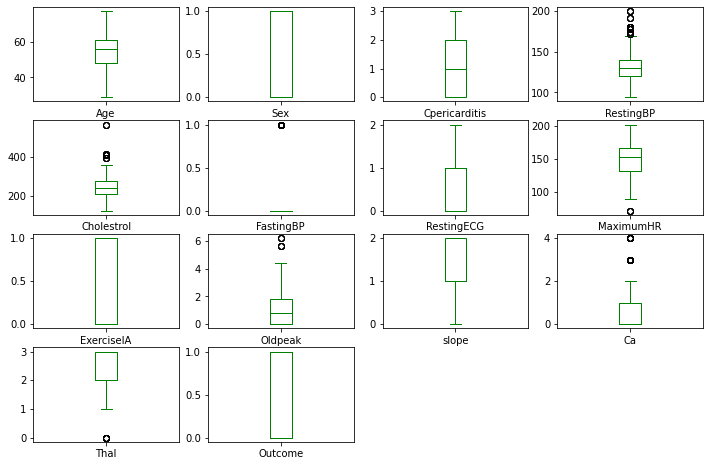

In [8]:
#Boxplot of each column
data.plot(color = 'g', kind='box', figsize=(12, 8), subplots=True, layout=(4,4))
plt.show()

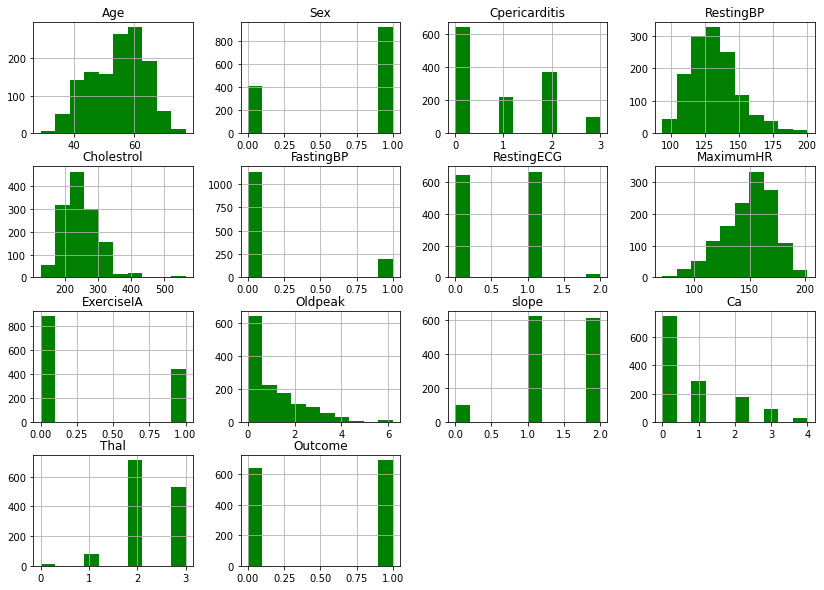

In [9]:
#histogram
data.hist(color='green',bins=10,figsize=(14,10))
plt.show()

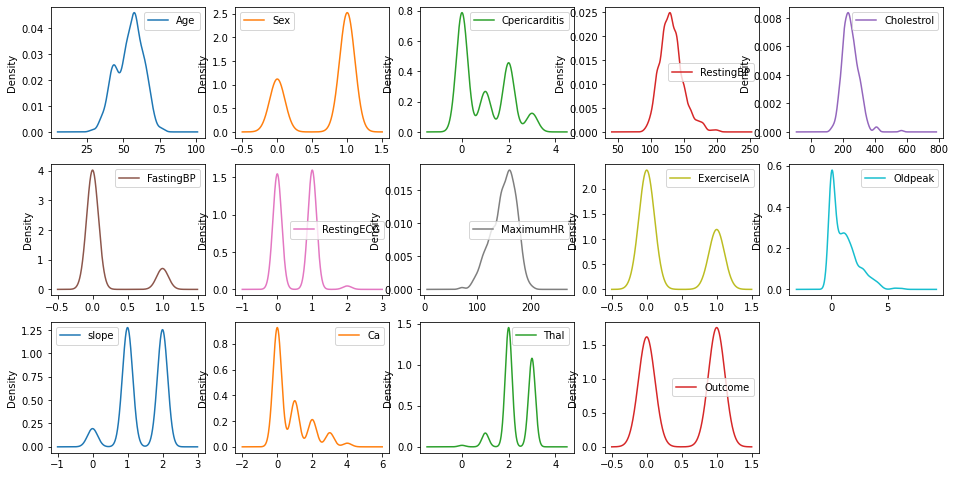

In [10]:
#Boxplot of each column
data.plot( kind='density', figsize=(16,14), subplots=True, layout=(5,5),sharex=False)
plt.show()

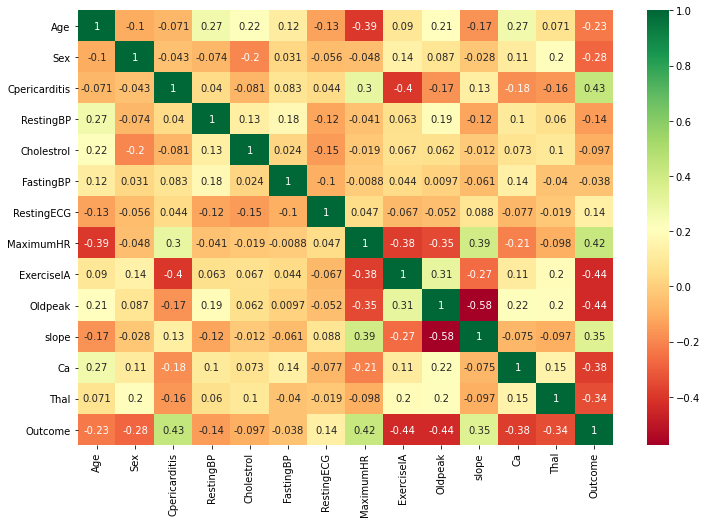

In [11]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
import plotly.graph_objects as go

In [13]:
column_names = data.columns
no_of_boxes = len(column_names)
colors = [ 'hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 360, no_of_boxes)]

fig = go.Figure(data = [go.Box(y = data.loc[:, column_names[i]], marker_color = colors[i], name = column_names[i], boxmean = True, showlegend = True) for i in range(no_of_boxes)])

fig.update_layout(
    xaxis=dict(showgrid = True, zeroline = True, showticklabels = True),
    yaxis=dict(zeroline = True, gridcolor = 'white'),
    paper_bgcolor = 'rgb(233,233,233)',
    plot_bgcolor = 'rgb(233,233,233)')

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



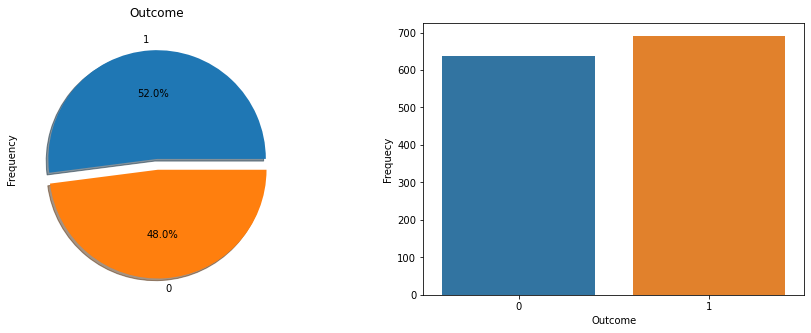

In [19]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['Outcome'])
#plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")
plt.ylabel("Frequecy")

#Piechart show
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('Frequency')
plt.show()

<Figure size 2160x2160 with 0 Axes>

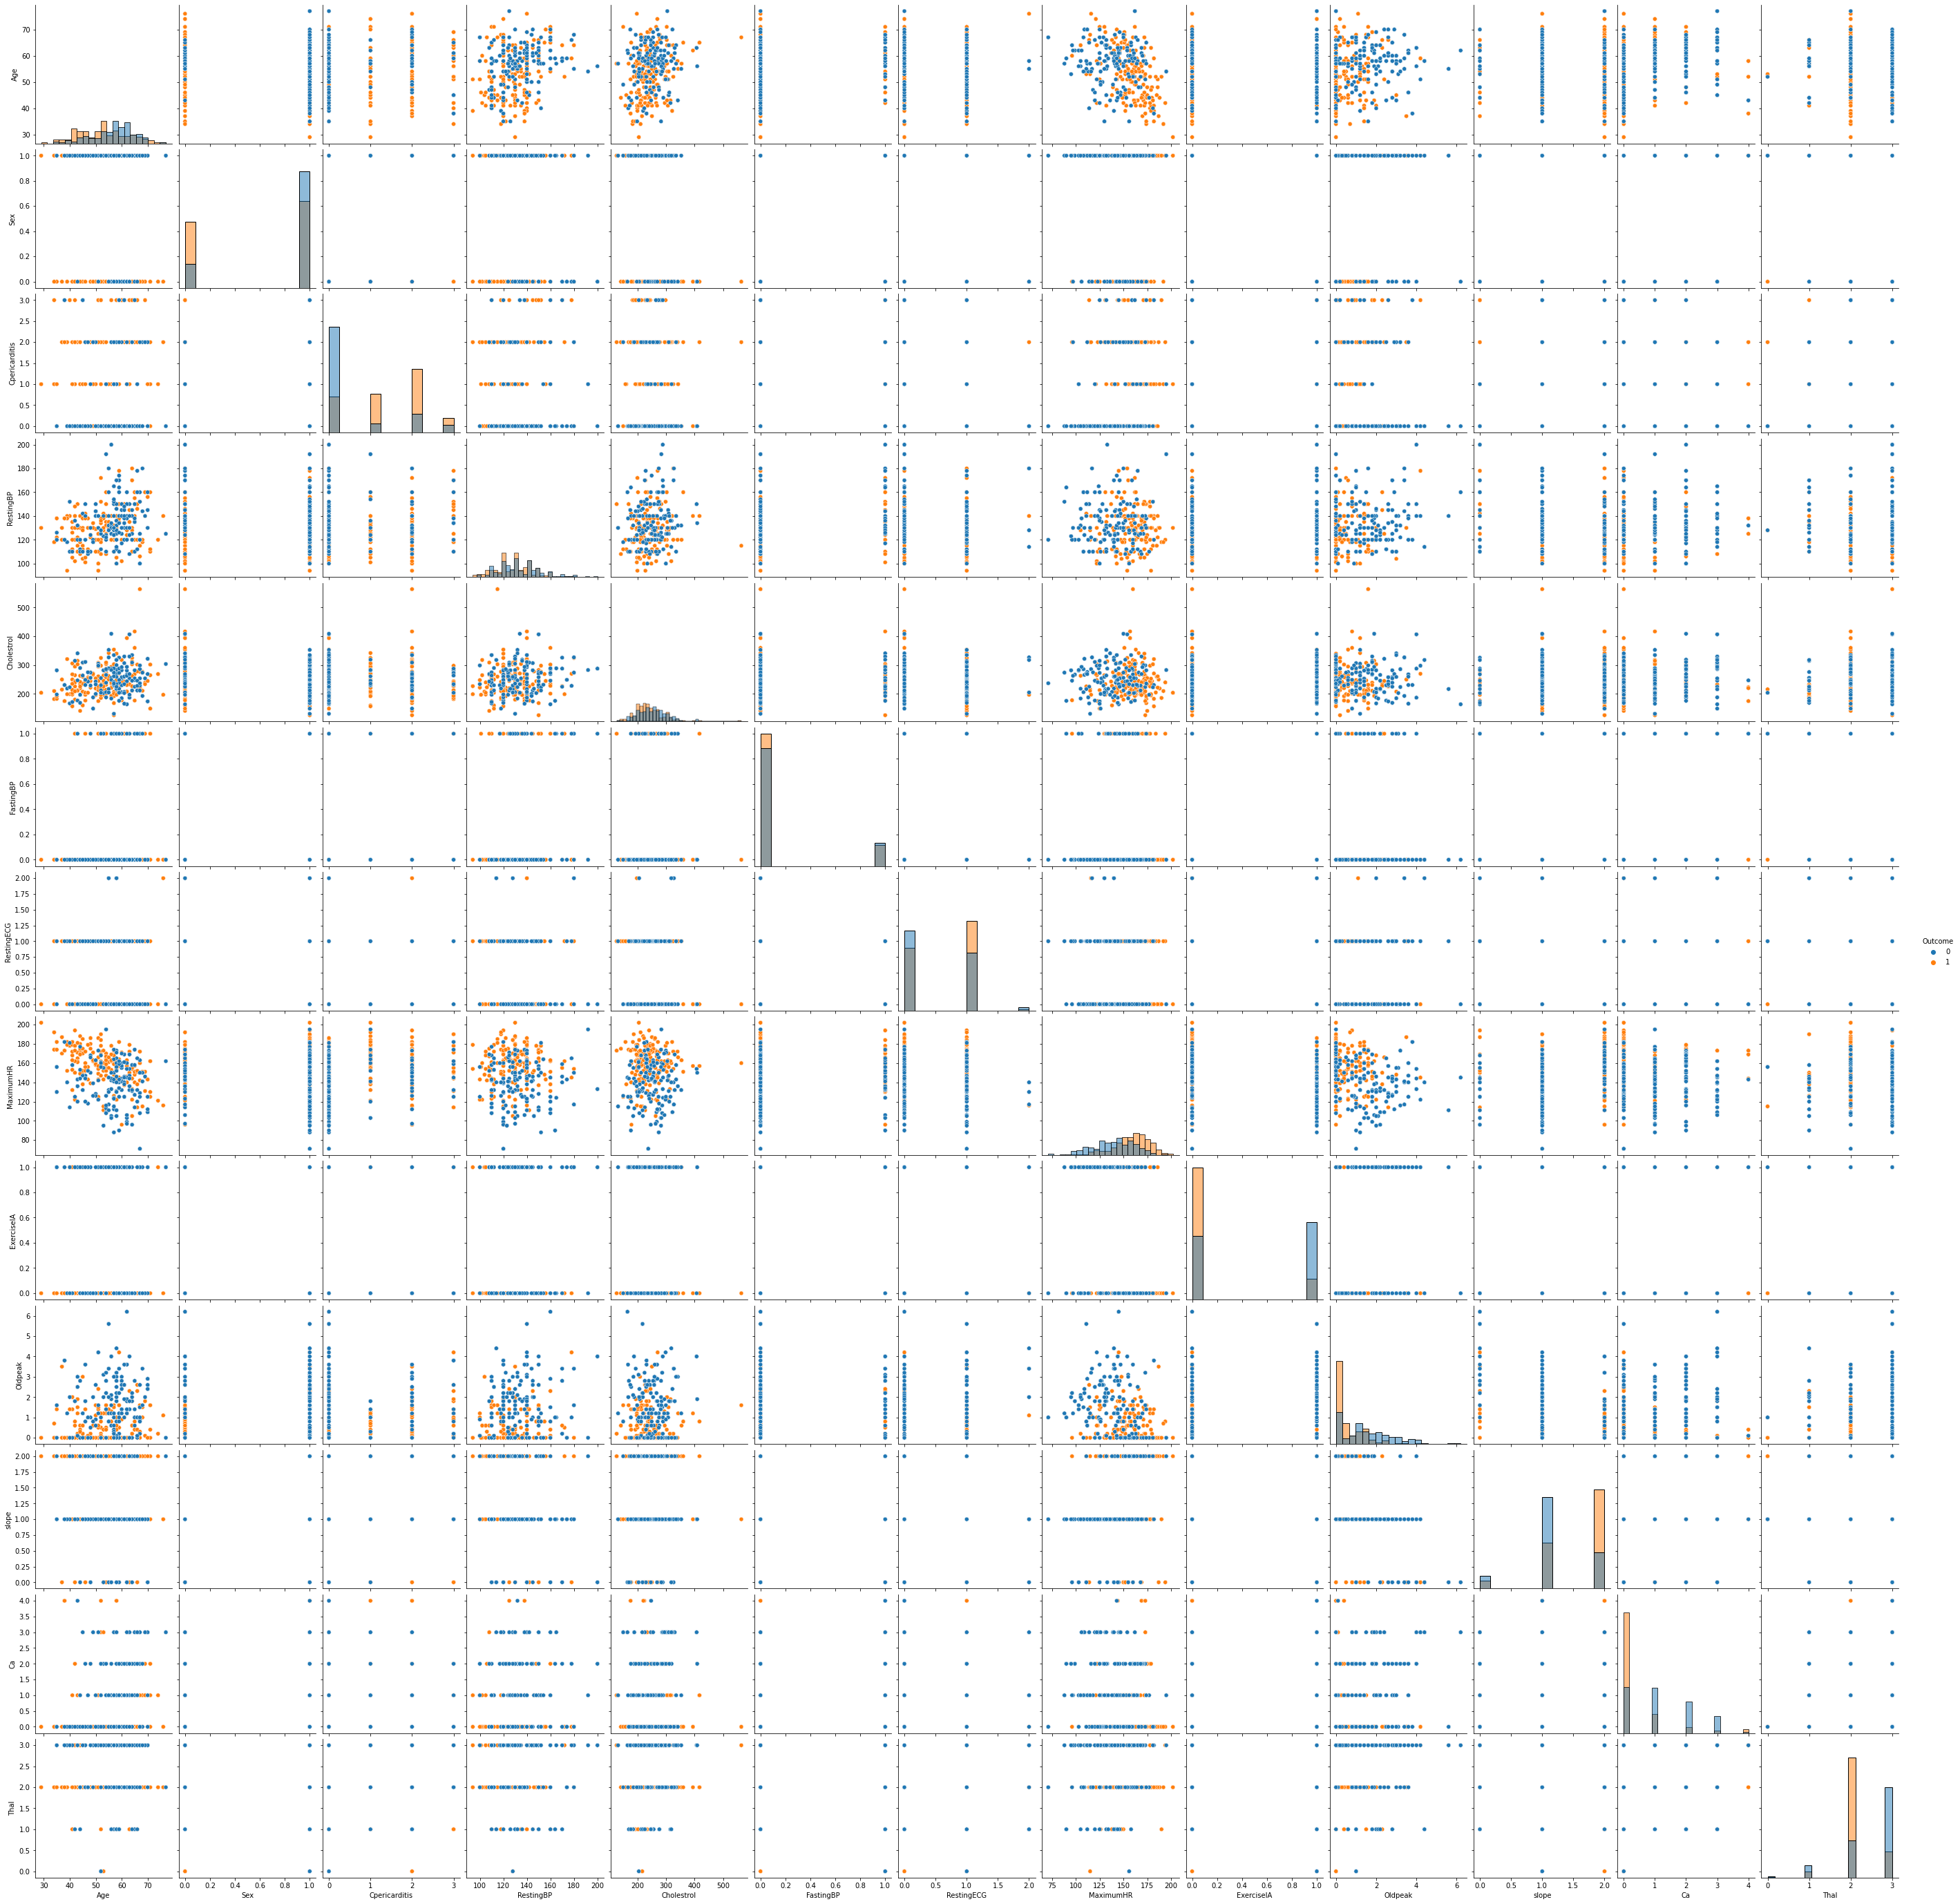

In [21]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, hue='Outcome', height=3, diag_kind='hist')

In [37]:
data.columns

Index(['Age', 'Sex', 'Cpericarditis', 'RestingBP', 'Cholestrol', 'FastingBP',
       'RestingECG', 'MaximumHR', 'ExerciseIA', 'Oldpeak', 'slope', 'Ca',
       'Thal', 'Outcome'],
      dtype='object')

In [38]:
#reading data from pandas
col_names = ['Age', 'Sex', 'Cpericarditis', 'RestingBP', 'Cholestrol', 'FastingBP',
       'RestingECG', 'MaximumHR', 'ExerciseIA', 'Oldpeak', 'slope', 'Ca',
       'Thal', 'Outcome']
df = pd.read_csv("Heart Disease Prediction.csv", header=1, names=col_names)

Looks major of the attributes contain Non-Normally Distributed data points.
Also Data is seriously imbalance.

*Checking for null values distribution...*

<AxesSubplot:>

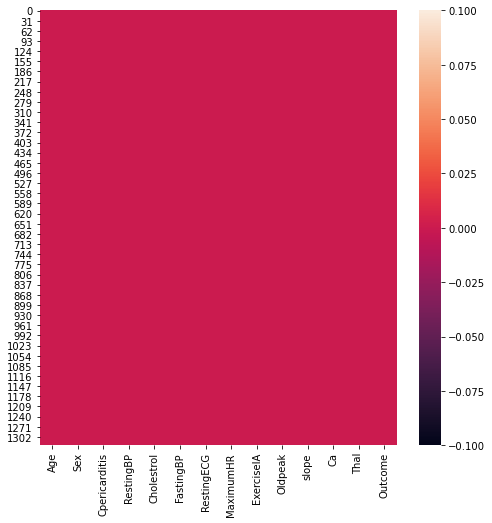

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

*Checking for feature importance of attributes...
By feeding data to Classifier
*

In [40]:
X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]

Age -> 0.039914988
Sex -> 0.064942956
Cpericarditis -> 0.27777046
RestingBP -> 0.035726376
Cholestrol -> 0.032609973
FastingBP -> 0.040621974
RestingECG -> 0.03781794
MaximumHR -> 0.028908566
ExerciseIA -> 0.06734755
Oldpeak -> 0.05540012
slope -> 0.046476986
Ca -> 0.1271228
Thal -> 0.14533924


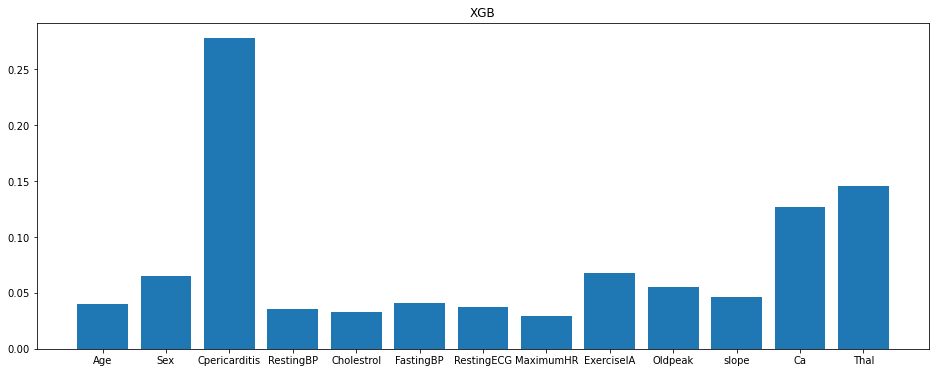

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

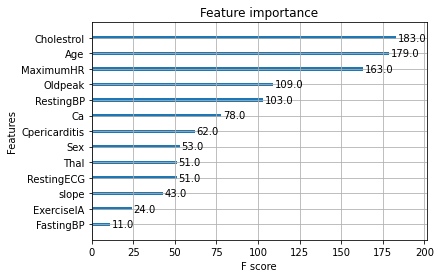

In [29]:
XGBR = XGBClassifier()
XGBR.fit(X,Y)
features = XGBR.feature_importances_
Columns = X.columns
for i,j in enumerate(features):
    print(Columns[i],"->",j)

plt.figure(figsize=(16,6))
plt.title(label="XGB")
#plt.bar([x for x in range(len(features))],features)
plt.bar([x for x in (Columns)],features)
plt.show()

plot_importance(XGBR)

In [42]:
#X = df_upsampled.drop(["Outcome" ,"BloodPressure", "Pregnancies"  ,"SkinThickness" ,"Insulin"],axis=1)
#Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))


RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
  random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       122

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Voting Ensemble:> 1.0
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       126
           1       0.93      0.81      0.87       140

    accuracy                           0.87       266
   macro avg       0.88      0.88      0.87       266
weighted avg       0.88      0.87      0.87       266

SVM:> 0.8721804511278195
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       122

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.



              precision    recall  f1-score   support

           0       0.81      0.95      0.87       122
           1       0.95      0.81      0.87       144

    accuracy                           0.87       266
   macro avg       0.88      0.88      0.87       266
weighted avg       0.88      0.87      0.87       266

LinearDiscriminantAnalysis:> 0.8721804511278195
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       122
           1       0.80      0.68      0.74       144

    accuracy                           0.74       266
   macro avg       0.74      0.74      0.74       266
weighted avg       0.75      0.74      0.74       266

KNeighborsClassifier:> 0.7368421052631579
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       126
           1       0.93      0.81      0.87       140

    accuracy                           0.87       266
   macro avg       0.88      0.88     

From above graph we can say Skin "Thickness" is least important attribute.

Where "Glucose", "DiabetesPedigreeFunction","BMI" are oe of the most attributes.

Lets benchmark dataset i.e. train Classifier without any explicit featue engineering or modification in data.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       132

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

1.0


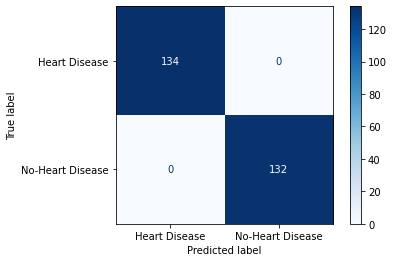

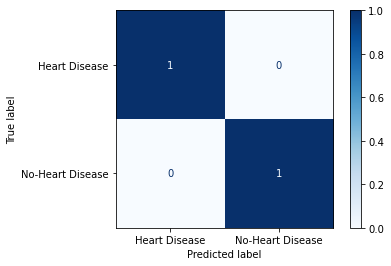

In [32]:
X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Heart Disease","No-Heart Disease"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Heart Disease","No-Heart Disease"],cmap=plt.cm.Blues,normalize='true')

To performance lets adjust distribution of these attributes->

"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"

Taking log value of data-points of these features will distribute them normally.

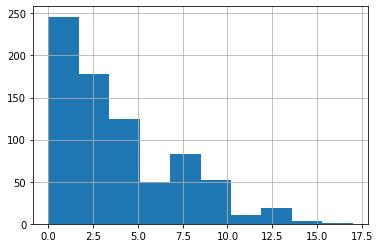

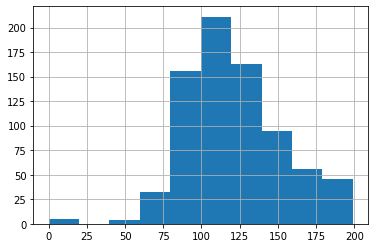

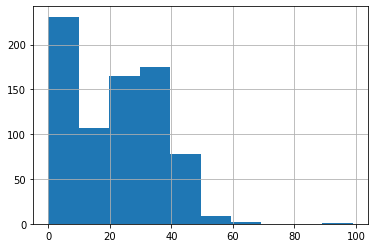

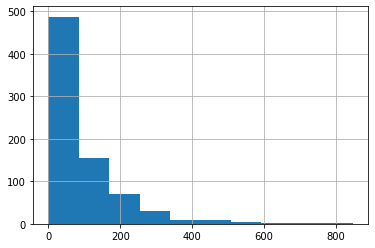

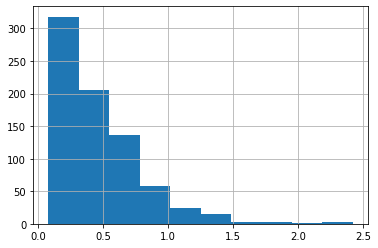

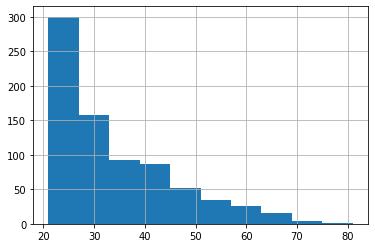

After normal distibution operation



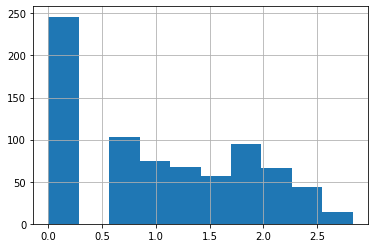

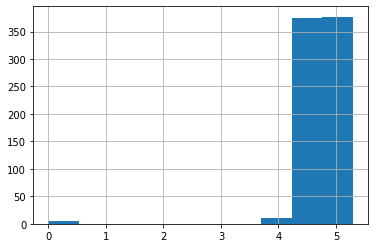

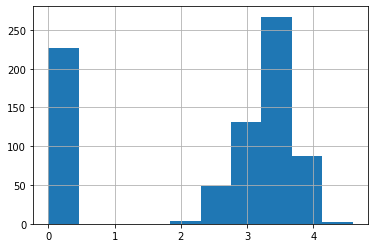

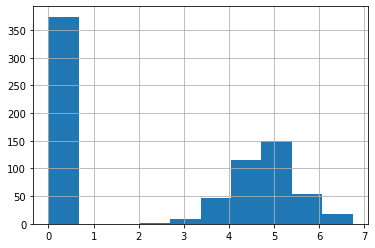

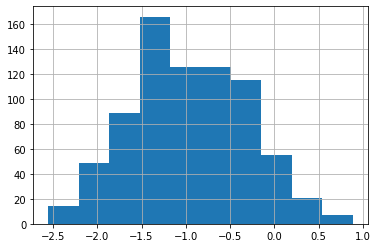

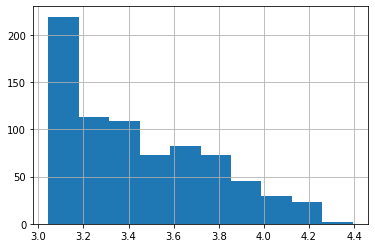

In [129]:
#"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"
data_new = data.copy()

data_new["Pregnancies"].hist()
plt.show()
data_new["Glucose"].hist()
plt.show()
data_new["SkinThickness"].hist()
plt.show()
data_new["Insulin"].hist()
plt.show()
data_new["DiabetesPedigreeFunction"].hist()
plt.show()
data_new["Age"].hist()
plt.show()


data_new["Pregnancies"] = [np.log(i) if i!=0 else 0 for i in data_new["Pregnancies"]]
data_new["Glucose"] = [np.log(i) if i!=0 else 0 for i in data_new["Glucose"]]
data_new["SkinThickness"] = [np.log(i) if i!=0 else 0 for i in data_new["SkinThickness"]]
data_new["Insulin"] = [np.log(i) if i!=0 else 0 for i in data_new["Insulin"]]
data_new["DiabetesPedigreeFunction"] = [np.log(i) if i!=0 else 0 for i in data_new["DiabetesPedigreeFunction"]]
data_new["Age"] = [np.log(i) if i!=0 else 0 for i in data_new["Age"]]

print("="*10,"\nAfter normal distibution operation\n")

data_new["Pregnancies"].hist()
plt.show()
data_new["Glucose"].hist()
plt.show()
data_new["SkinThickness"].hist()
plt.show()
data_new["Insulin"].hist()
plt.show()
data_new["DiabetesPedigreeFunction"].hist()
plt.show()
data_new["Age"].hist()
plt.show()

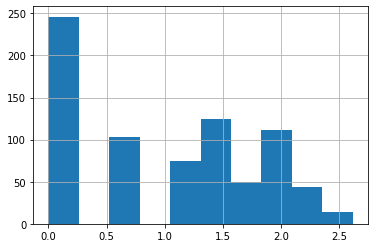

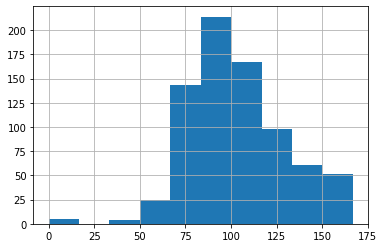

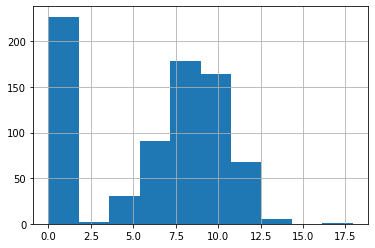

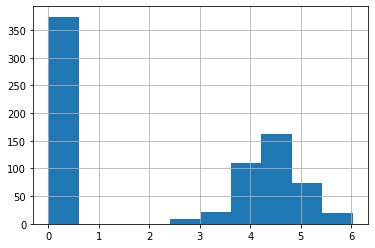

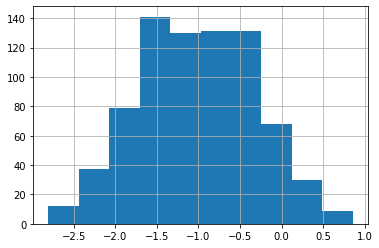

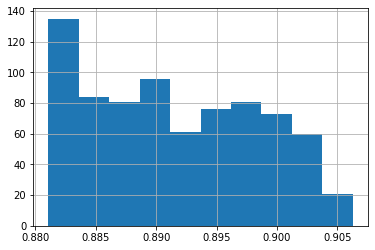

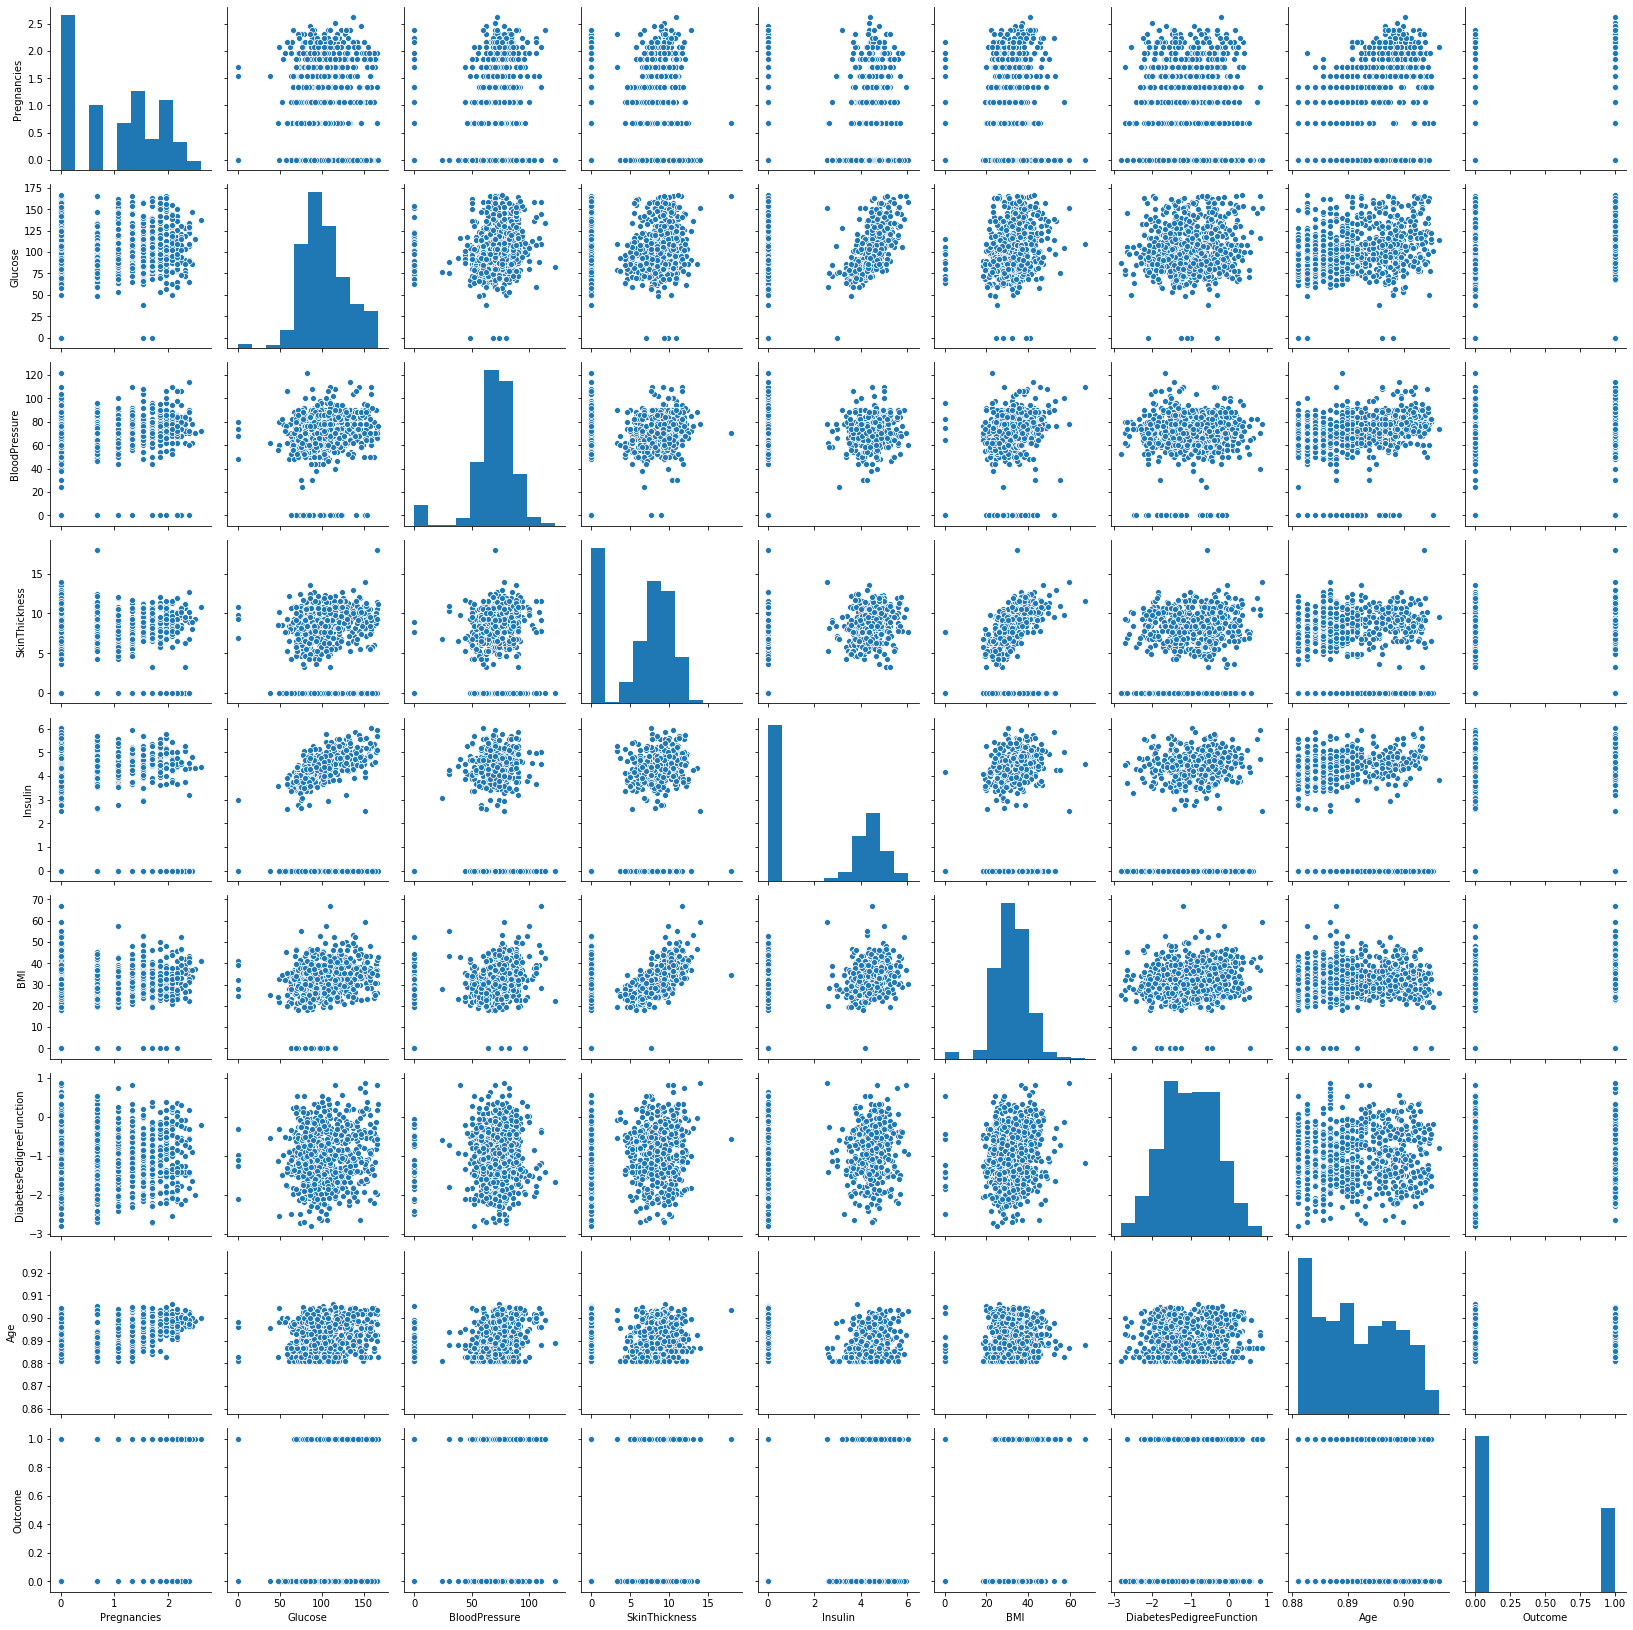

In [111]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
#"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"

data_boxcox = data.copy()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Pregnancies"].values]
data_boxcox["Pregnancies"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Pregnancies"],fitted_lambda)
data_boxcox["Pregnancies"].hist()
plt.show()


to_convert = [i if i!=0 else 1 for i in data_boxcox["Glucose"].values]
data_boxcox["Glucose"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Glucose"],fitted_lambda)
data_boxcox["Glucose"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["SkinThickness"].values]
data_boxcox["SkinThickness"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["SkinThickness"],fitted_lambda)
data_boxcox["SkinThickness"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Insulin"].values]
data_boxcox["Insulin"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Insulin"],fitted_lambda)
data_boxcox["Insulin"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["DiabetesPedigreeFunction"].values]
data_boxcox["DiabetesPedigreeFunction"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["DiabetesPedigreeFunction"],fitted_lambda)
data_boxcox["DiabetesPedigreeFunction"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Age"].values]
data_boxcox["Age"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Age"],fitted_lambda)
data_boxcox["Age"].hist()
plt.show()

sns.pairplot(data_boxcox)

In [112]:
print(data_new.describe())
print(data_boxcox.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      1.039014    4.739263      69.105469       2.326569    2.466624   
std       0.855078    0.457964      19.355807       1.542979    2.456257   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.000000    4.595120      62.000000       0.000000    0.000000   
50%       1.098612    4.762174      72.000000       3.135494    3.416516   
75%       1.791759    4.943422      80.000000       3.465736    4.846148   
max       2.833213    5.293305     122.000000       4.595120    6.740519   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                 -0.959940    3.448802    0.348958  
std      7.884160                  0.644322    0.322702    0.476951  
min      0.000000                 -

# Term Normally Distributed data referes to <br>
1] Satndard Deviation of data = 1 and Mean of data = 0. <br>
2] Graph plot of data gives Bell Curve<br>

![Bell Curve](https://i.pinimg.com/originals/dd/5e/f9/dd5ef94c82281d75ff0bce252c6be136.jpg)
<br>
<br>
Intuition behind the the Nromal Data Distribution in simple langugae is Most of the data is<br>
at near Mean of the whole data. <br>

68% data points relie between -1 and 1<br>
95% data points reliw between -2 and 2<br>

Standard deviation ensures that all the data points are grouped together and having specific range.<br>
Infact Stadard deviation = 1 removes outliers from data. Outliers are the points which not fit <br>
in the normal range of points. It is simply away from the mean.<br>


From above graphs after logarithm value method and BoxCox method both are removing outliers from data.<br>
Graph shows data after BoxCox method data is normally distributed. <br>
Where mathematical values are showing log value has removed outliers <br>

We will try both methods.

In [33]:
X = data_boxcox.drop(["Outcome"],axis=1)
Y = data_boxcox["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

NameError: name 'data_boxcox' is not defined

# Understanding Classification report
![Metrics](https://static.packt-cdn.com/products/9781785282287/graphics/B04223_10_02.jpg)
![Accuracy](https://miro.medium.com/max/1594/0*qLxAWTs-gZjQvTi4.jpg)
![Precision](https://miro.medium.com/max/1104/1*5PvyyMvH5n42XICQrlXOzw.png)
![Recall](https://lawtomated.com/wp-content/uploads/2019/10/Recall_1.png)
![F1 Score](https://datascience103579984.files.wordpress.com/2019/04/capture3-24.png)



[13:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.72      0.67      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

0.8051948051948052


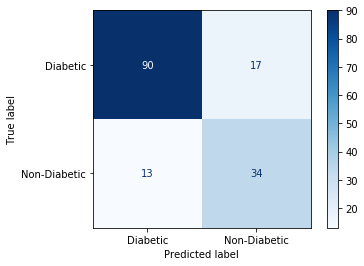

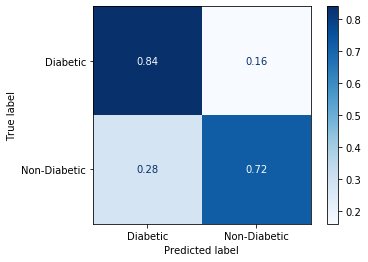

In [114]:
X = data_new.drop(["Outcome"],axis=1)
Y = data_new["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

Accuracy increased significantly!!!.😀 <br>
One more noticable thing is improvement in performance of model for second class. <br>
Look at Precision, Recall and F1 Score is increased for first class but also for second class. <br>

Now lets tackle second problem which is Imabalance Data.


Count of Negative class:  500
Count of Positive class:  268


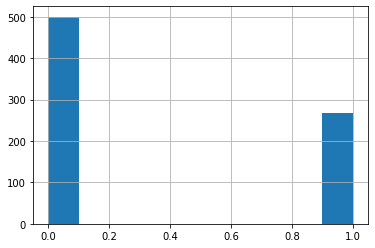

In [115]:
print("Count of Negative class: ",list(data["Outcome"]).count(0))
print("Count of Positive class: ",list(data["Outcome"]).count(1))
data["Outcome"].hist()


Data is highly biased towards Negative outcome i.e "0" than positive "1".<br>
Out of 768 records 500 records holds Negative outcome. Where only 268 records holds positive outcome. <br>

*To overcome this problem we can Up-Sample or Down-Sample data points according to Minority and Majority.*

In [36]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.Outcome==0]
df_minority = data_bal[data_bal.Outcome==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=268,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Outcome.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=500,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Outcome.value_counts())

NameError: name 'data_boxcox' is not defined

[13:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        57
           1       0.64      0.71      0.67        51

    accuracy                           0.68       108
   macro avg       0.68      0.68      0.68       108
weighted avg       0.68      0.68      0.68       108

0.6759259259259259


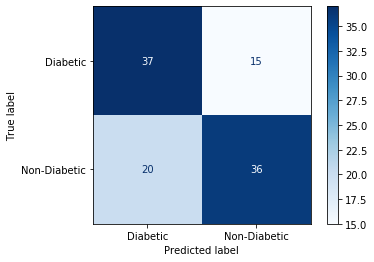

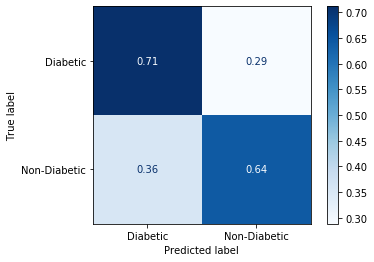

In [117]:
X = df_downsampled.drop(["Outcome"],axis=1)
Y = df_downsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

[13:47:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        84
           1       0.94      0.83      0.88       116

    accuracy                           0.87       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.87      0.87       200

0.87


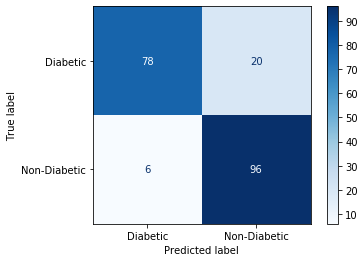

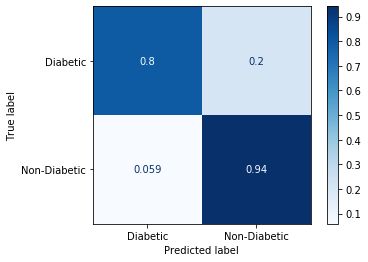

In [118]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

Accuracy and other metrics too says it all. <br>
Up-Sampling is helpfull in our case to make data balanced. <br>
Now to create an optimal model Fine-Tuning of model Classifer is needed.

[13:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        85
           1       0.94      0.83      0.88       115

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

0.875


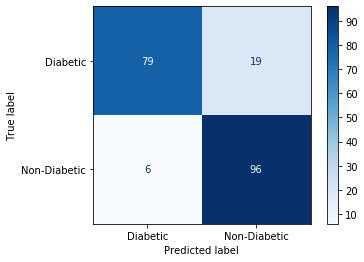

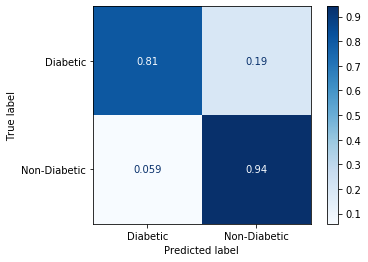

In [119]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.84      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

0.885


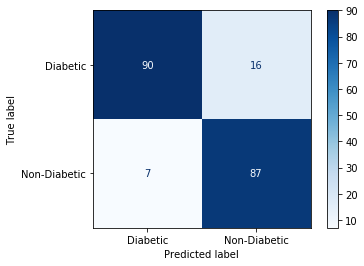

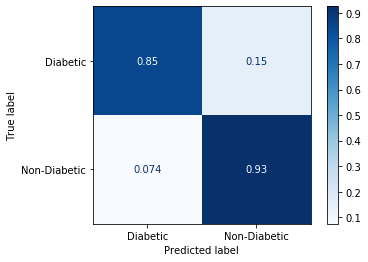

In [120]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

#RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')



1.5 % addition is also a good step.<br>
# Peak points till now:-> <br>
Benchmark : 75.97 <br>
XGB : 87.50 <br>
RF : 88.50

In [34]:
#Lets scale the data
StSc = StandardScaler()
MnMx = MinMaxScaler()

X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

X_train , X_test = MnMx.fit_transform(X_train) , MnMx.fit_transform(X_test)

RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
#RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')



NameError: name 'df_upsampled' is not defined

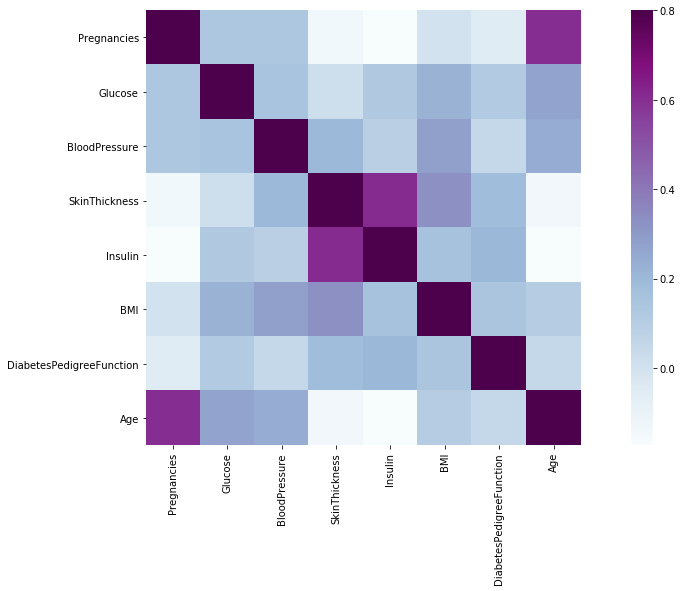

In [122]:
#Heat map of dataset with relative importance
matrix = data_boxcox.drop(["Outcome"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

Lets make action of Feature-Engineering. <br>
Remember attributes "Pregnancies" , "SkinThickness" , "Insulin" are having less imporance so lets send them for rest.

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        96
           1       0.94      0.85      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

0.89


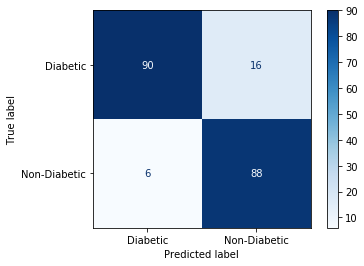

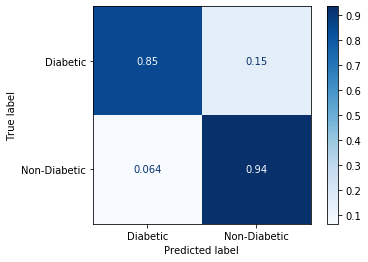

In [123]:
#X = df_upsampled.drop(["Outcome" , "Pregnancies" , "SkinThickness" ,"Insulin"],axis=1) # 0.89
X = df_upsampled.drop(["Outcome" ,"BloodPressure", "Pregnancies"  ,"SkinThickness" ,"Insulin"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
#RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')


In [35]:
X = df_upsampled.drop(["Outcome" ,"BloodPressure", "Pregnancies"  ,"SkinThickness" ,"Insulin"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))


RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))



NameError: name 'df_upsampled' is not defined

C:\Users\Shahid\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.91      0.78      0.84        55

    accuracy                           0.90       154
   macro avg       0.90      0.87      0.88       154
weighted avg       0.90      0.90      0.89       154

XGBoost:> 0.8961038961038961
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.91      0.78      0.84        55

    accuracy                           0.90       154
   macro avg       0.90      0.87      0.88       154
weighted avg       0.90      0.90      0.89       154

0.89610

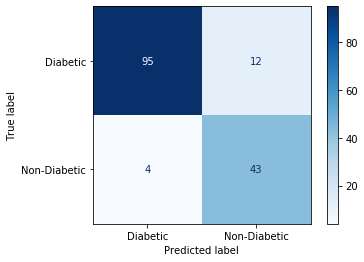

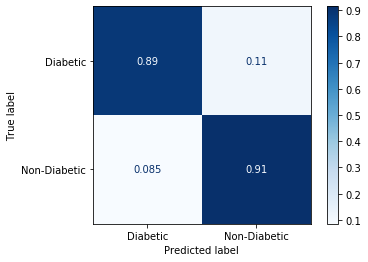

In [130]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBC,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBC,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

# Magical Outliers Removing Technique 🚀
<br>
In this method outliers will be removed from original data and will directly fitted in model without any<br>
explicit feature engineering or sampling.

In [125]:

data_ = data.copy()
data_.loc[(data_.SkinThickness<5)& (data_.Outcome==0), 'SkinThickness']=int(data_[(data_.Outcome==0)]['SkinThickness'].mean())
data_.loc[(data_.SkinThickness<5)& (data_.Outcome==1), 'SkinThickness']=int(data_[(data_.Outcome==1)]['SkinThickness'].mean())
data_.loc[(data_.Insulin==0)& (data_.Outcome==0), 'Insulin']=int(data_[(data_.Outcome==0)]['Insulin'].mean())
data_.loc[(data_.Insulin==0)& (data_.Outcome==1), 'Insulin']=int(data_[(data_.Outcome==1)]['Insulin'].mean())

In [126]:
X = np.array(data_[["Pregnancies","BloodPressure","Glucose","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
Y = np.array(data_.Outcome)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))



C:\Users\Shahid\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.87      0.82      0.85        50

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.89       154
weighted avg       0.90      0.90      0.90       154

Voting Ensemble:> 0.9025974025974026
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


C:\Users\Shahid\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.91      0.78      0.84        55

    accuracy                           0.90       154
   macro avg       0.90      0.87      0.88       154
weighted avg       0.90      0.90      0.89       154

XGBoost:> 0.8961038961038961
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.89      0.84      0.87        50

    accuracy                           0.92       154
   macro avg       0.91      0.90      0.90       154
weighted avg       0.91      0.92      0.91       154

RandomForestClassifier:> 0.9155844155844156
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.89      0.86      0.88        49

    accuracy                           0.92       154
   macro avg       0.91      0.90      0.91       154
w

C:\Users\Shahid\anaconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Shahid\anaconda3\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning:

The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.



              precision    recall  f1-score   support

           0       0.91      0.84      0.87       115
           1       0.62      0.74      0.67        39

    accuracy                           0.82       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.83      0.82      0.82       154

LinearDiscriminantAnalysis:> 0.8181818181818182
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       105
           1       0.81      0.78      0.79        49

    accuracy                           0.87       154
   macro avg       0.85      0.84      0.85       154
weighted avg       0.87      0.87      0.87       154

KNeighborsClassifier:> 0.8701298701298701
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       108
           1       0.64      0.65      0.65        46

    accuracy                           0.79       154
   macro avg       0.74      0.75     

# Results 💹📈
<br>
Benchmark : 75.97 <---> *Without any processing* <br>
XGBoost : 87.50 <---> *After Distribution Normalization + Up-Sampling + Feature Selection* <br>
XGBoost & Random Forest : 89.00 <---> *After Distribution Normalization + Up-Sampling + Feature Selection + Fine Tuning + Random State in Data Spliting*<br>
Gradient Boosting Classifier : 92.20 <---> *After removing outliers*

In [127]:
np.mean(list(data.SkinThickness))

20.536458333333332

# ROC Curve 

In [133]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

C:\Users\Shahid\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.91      0.78      0.84        55

    accuracy                           0.90       154
   macro avg       0.90      0.87      0.88       154
weighted avg       0.90      0.90      0.89       154

XGBoost:> 0.8961038961038961


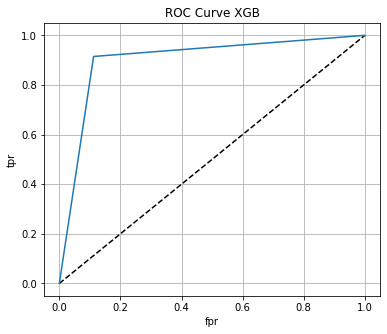

In [139]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve XGB')
plt.grid(True)

plt.subplots_adjust(top=4, bottom=0.40, left=0.20, right=3.0, hspace=0.40, wspace=0.30)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.89      0.84      0.87        50

    accuracy                           0.92       154
   macro avg       0.91      0.90      0.90       154
weighted avg       0.91      0.92      0.91       154

RandomForestClassifier:> 0.9155844155844156


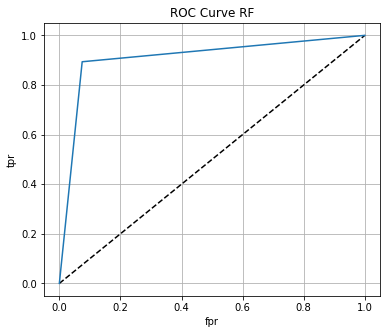

In [141]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve RF')
plt.grid(True)

plt.subplots_adjust(top=4, bottom=0.40, left=0.20, right=3.0, hspace=0.40, wspace=0.30)
plt.show()

C:\Users\Shahid\anaconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Shahid\anaconda3\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning:

The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.



              precision    recall  f1-score   support

           0       0.91      0.93      0.92       104
           1       0.85      0.80      0.82        50

    accuracy                           0.89       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.89      0.89      0.89       154

DecisionTreeClassifier:> 0.8896103896103896


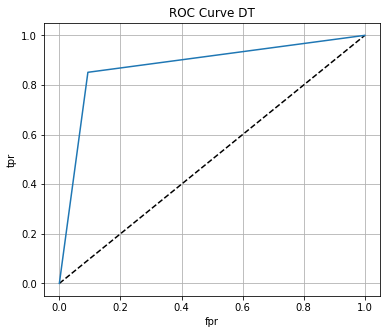

In [143]:
Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='DT')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve DT')
plt.grid(True)

plt.subplots_adjust(top=4, bottom=0.40, left=0.20, right=3.0, hspace=0.40, wspace=0.30)
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       101
           1       0.89      0.79      0.84        53

    accuracy                           0.90       154
   macro avg       0.90      0.87      0.88       154
weighted avg       0.90      0.90      0.89       154

AdaBoostClassifier:> 0.8961038961038961


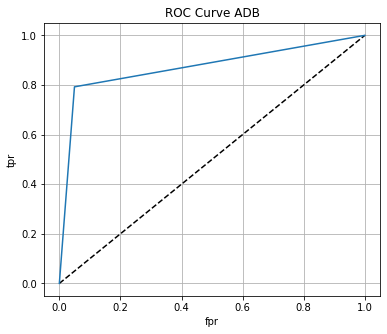

In [147]:
Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


fpr, tpr, thresholds = roc_curve(y_pred,y_test)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ADB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve ADB')
plt.grid(True)

plt.subplots_adjust(top=4, bottom=0.40, left=0.20, right=3.0, hspace=0.40, wspace=0.30)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.89      0.86      0.88        49

    accuracy                           0.92       154
   macro avg       0.91      0.90      0.91       154
weighted avg       0.92      0.92      0.92       154

GradientBoostingClassifier:> 0.922077922077922


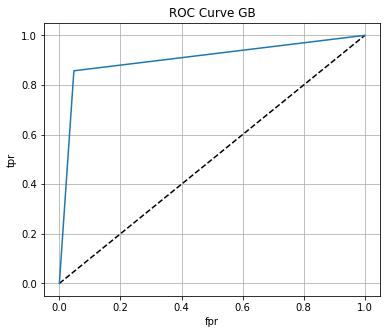

In [148]:
Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


fpr, tpr, thresholds = roc_curve(y_pred,y_test)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='GB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve GB')
plt.grid(True)

plt.subplots_adjust(top=4, bottom=0.40, left=0.20, right=3.0, hspace=0.40, wspace=0.30)
plt.show()

Visit for outlier removal techniques<br> 
https://www.kaggle.com/akhileshdkapse/starter-guide-eda-acc-87-precision-92/notebook#Removing-outliers-! <br>
And <br>
https://www.kaggle.com/abdulrahmanahajj/diabetes-acc-92-auc-0-914 